<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4.1 (a) Data exploration

In [112]:
df = pd.read_csv('/content/drive/MyDrive/ML/Lab4/CarPrice.csv')

In [113]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [114]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [115]:
df = df.drop(columns=['car_ID','CarName'])

In [116]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# 4.1 (b) Data Transform and Feature Selection

*   Standardized Data for continuous data columns for only continuous data columns




In [118]:
continuous_data = ['wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',	'peakrpm',	'citympg',	'highwaympg',	'price']

In [119]:
x = df[continuous_data]

In [120]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [121]:
x_scaler = preprocessing.StandardScaler()
x_transform = x_scaler.fit_transform(x)

In [122]:
x_transform

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.95301169,
        -0.83719538,  1.17303131]])



*   Calculate correlation between variables for only continuous data columns




In [123]:
cor_data = x.corr()

In [124]:
cor_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


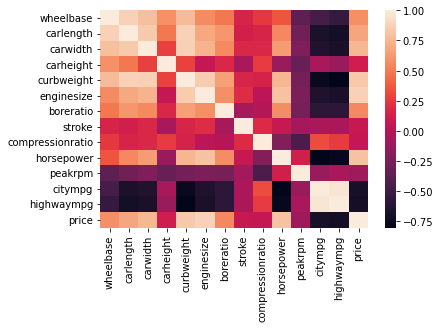

In [125]:
sns.heatmap(cor_data)



*   Reduce Corr() to Lower Matrix




In [126]:
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [127]:
lower

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,0.000000,0.000000,0.000000,0.000000,0.0




*   Drop columns if correlation value > 0.86




In [128]:
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if i > 0.86 :
     to_drop.append(column)

In [129]:
to_drop

['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']

In [130]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [131]:
df.drop(to_drop, inplace=True, axis=1)

In [132]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,3,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,2,gas,std,four,sedan,fwd,front,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,2,gas,std,four,sedan,4wd,front,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,55.5,2952,ohc,four,mpfi,3.78,3.15,9.5,114,5400,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,55.5,3049,ohc,four,mpfi,3.78,3.15,8.7,160,5300,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,55.5,3012,ohcv,six,mpfi,3.58,2.87,8.8,134,5500,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,55.5,3217,ohc,six,idi,3.01,3.40,23.0,106,4800,27,22470.0




*   OneHotEncode for categorical columns (try from Pandas)




In [133]:
one_hot = pd.get_dummies(df['carbody'])

In [134]:
one_hot

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [135]:
df = df.join(one_hot)

In [136]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,convertible,hardtop,hatchback,sedan,wagon
0,3,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,1,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,1,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,0,0,0,1,0
4,2,gas,std,four,sedan,4wd,front,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,55.5,2952,ohc,four,mpfi,3.78,3.15,9.5,114,5400,28,16845.0,0,0,0,1,0
201,-1,gas,turbo,four,sedan,rwd,front,55.5,3049,ohc,four,mpfi,3.78,3.15,8.7,160,5300,25,19045.0,0,0,0,1,0
202,-1,gas,std,four,sedan,rwd,front,55.5,3012,ohcv,six,mpfi,3.58,2.87,8.8,134,5500,23,21485.0,0,0,0,1,0
203,-1,diesel,turbo,four,sedan,rwd,front,55.5,3217,ohc,six,idi,3.01,3.40,23.0,106,4800,27,22470.0,0,0,0,1,0


# 4.2 PCA Dimensional Reduction

In [139]:
pca = PCA()
x_pca = pca.fit_transform(x_transform)



*   Visualize Explained Variance Ratio (% eigenvalues)




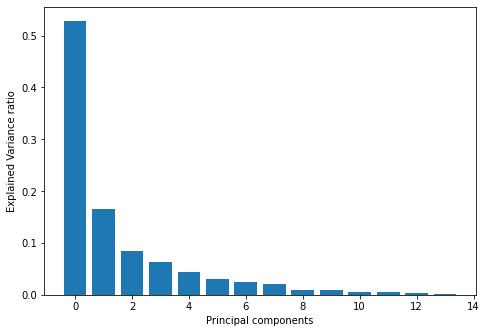

In [141]:
num_of_var = [] 
for i in range(len(pca.explained_variance_ratio_)):
  num_of_var.append(i)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(num_of_var,pca.explained_variance_ratio_)
ax.set_ylabel('Explained Variance ratio')
ax.set_xlabel('Principal components')
plt.show()

# PCA n_components (ทดลองเปลี่ยนค่า n_components อย่างน้อย 3 ค่า เพื่อเลือกค่าดีที่สุด)

In [142]:
pca2 = PCA(n_components=3)
x_pca2 = pca2.fit_transform(x_transform)

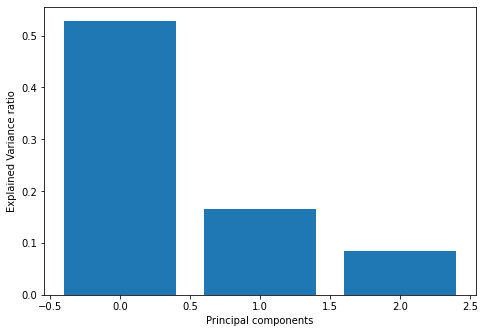

In [143]:
num_of_var = [] 
for i in range(len(pca2.explained_variance_ratio_)):
  num_of_var.append(i)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(num_of_var,pca2.explained_variance_ratio_)
ax.set_ylabel('Explained Variance ratio')
ax.set_xlabel('Principal components')
plt.show()

# 4.3 Linear Regression


*   Shuffle Split (Train / Test Split)


